# Explore here

In [3]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from pickle import dump
import json

In [4]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep=",")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 1. Exploración y limpieza

In [5]:
print(" The total number of rows in the dataset is: ", total_data.shape)
print("--------------------")
total_data.info()

 The total number of rows in the dataset is:  (1338, 7)
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Conclusiones:

1) El Dataframe contiente 1338 filas (registros) y 7 columnas (Variables)
2) Analizando la información disponible, se identifica que no existes valores NaN, por loq ue tendremos control total sobre la información del data.

En cuanto a la clasificación de los datos:

* Características categóricas (3 en total)
* Características numéricas (4 en total)


### 1.1 Quitar Duplicados

In [6]:
total_data.drop_duplicates(inplace=True)
print(f"Registros duplicados eliminados: {len(total_data) - len(total_data.drop_duplicates())}")

Registros duplicados eliminados: 0


Conclusiones:

Este DF no tiene registros duplicados

### 1.2 Eliminar información innecesaria

In [7]:
total_data.drop([], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Conclusiones: consideramos que todas las colunas son necesarias.

## 2. Análisis de variables Univariadas

### 2.1 Varbiables categóricas

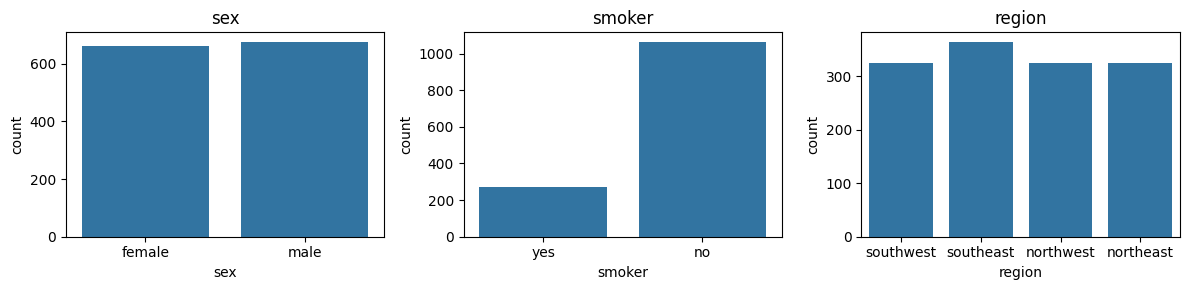

In [18]:
fig, axis = plt.subplots(1, 3, figsize=(12, 3)) #Se cambia el numero de filas y columnas para que se adapte.
axis = axis.flatten() #Se aplana el array para facilitar la iteracion.

#'sex', 'smoker', 'region'

    # Crear histograma

sns.countplot(ax=axis[0], data=total_data, x="sex")
axis[0].set_title("sex")
sns.countplot(ax=axis[1], data=total_data, x="smoker")
axis[1].set_title("smoker")
sns.countplot(ax=axis[2], data=total_data, x="region")
axis[2].set_title("region")

# Ajustar y mostrar gráficos
plt.tight_layout()
plt.show()

Conclusiones

1) Sexo: Distribución equilibrada entre hombres y mujeres.
2) Fumadores: La mayoría son no fumadores.
3) Región: Distribución similar en todas las regiones.

### 2.2 Variables Numéricas

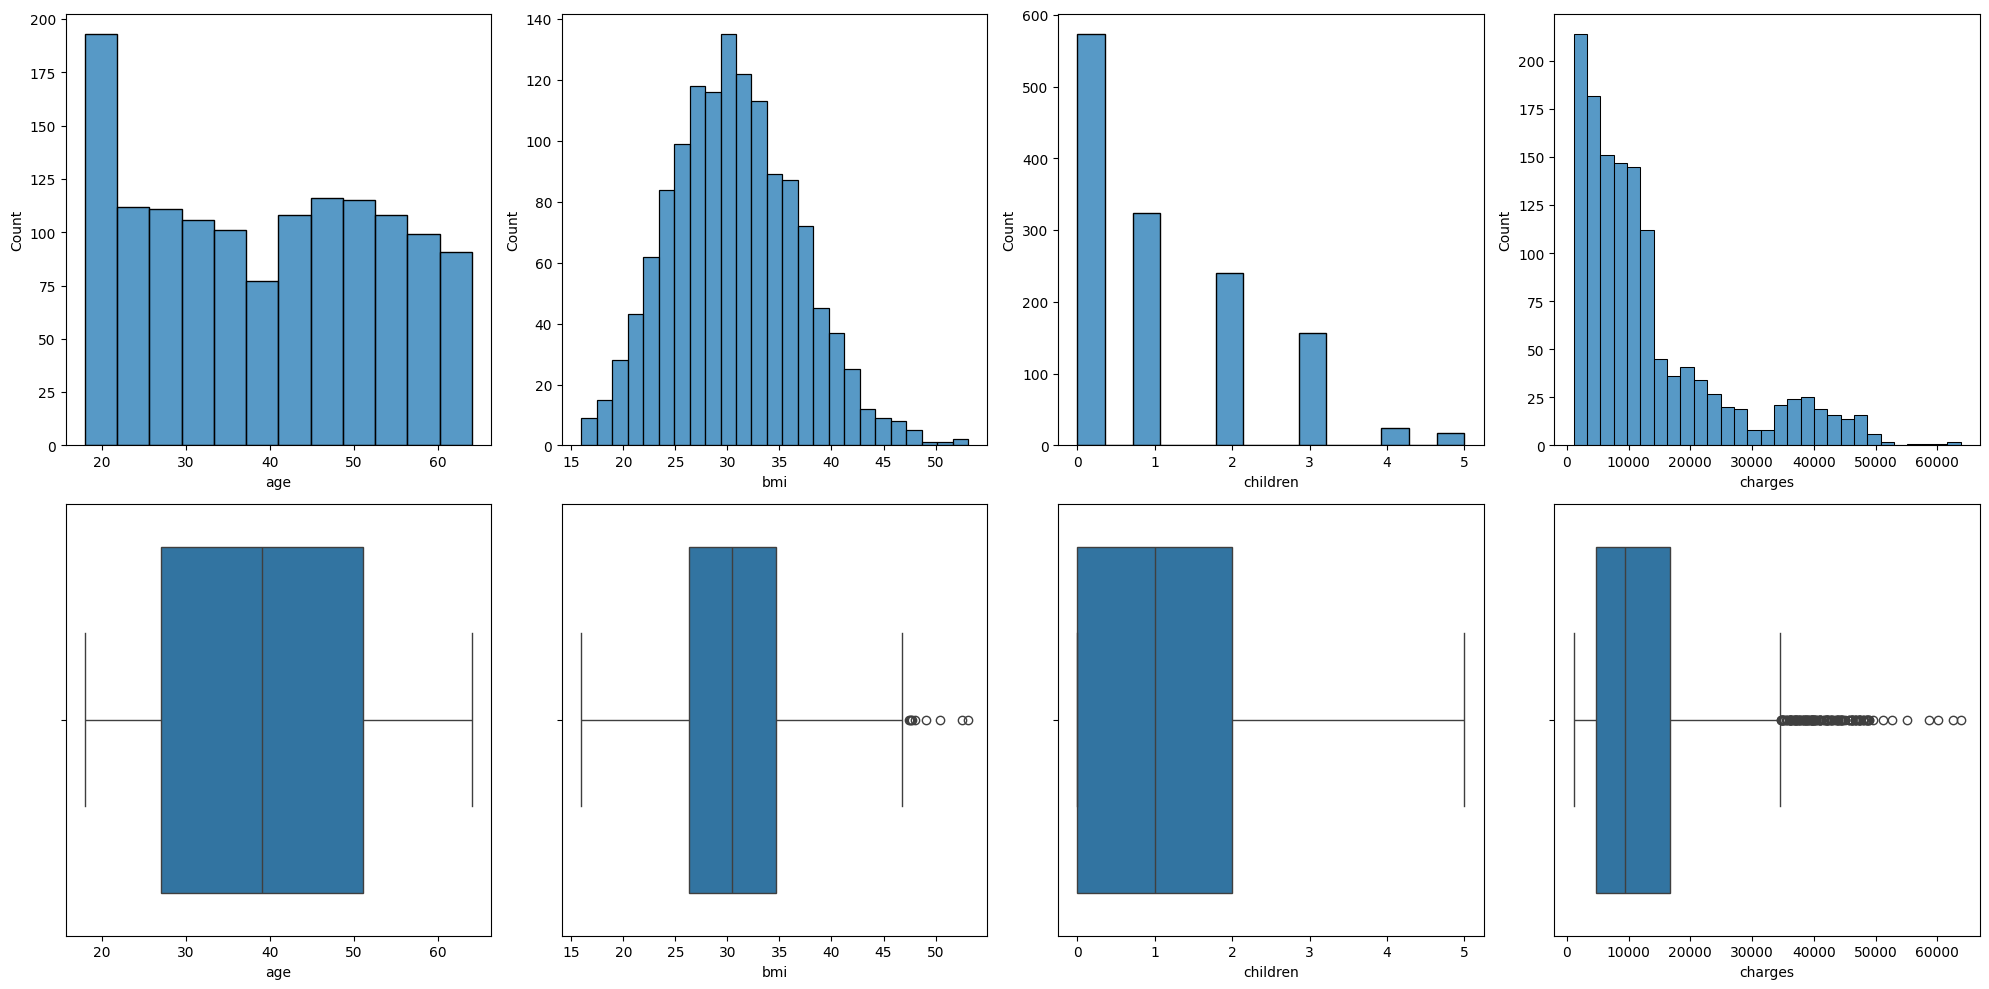

In [ ]:
#'age', 'bmi', 'children', 'charges'

fig, axis = plt.subplots(2, 4, figsize=(20, 10))  # Cambiado a 2 filas, 4 columnas

sns.histplot(ax=axis[0, 0], data=total_data, x="age")
sns.boxplot(ax=axis[1, 0], data=total_data, x="age")
sns.histplot(ax=axis[0, 1], data=total_data, x="bmi")
sns.boxplot(ax=axis[1, 1], data=total_data, x="bmi")
sns.histplot(ax=axis[0, 2], data=total_data, x="children")
sns.boxplot(ax=axis[1, 2], data=total_data, x="children") 
sns.histplot(ax=axis[0, 3], data=total_data, x="charges")
sns.boxplot(ax=axis[1, 3], data=total_data, x="charges")

plt.tight_layout()
plt.show()

Conclusiones:

1) Edad (age): Distribución relativamente uniforme, con una ligera tendencia hacia edades más jóvenes.
2) IMC: Distribución normal, centrada en un rango típico.
3) Hijos (children): Mayoría sin hijos o con pocos hijos.
4) Cargos (Charges): Mayoría de cargos bajos, con algunos cargos muy altos (posibles outliers).

## 3. Análisis de variables multivariante

### 3.1 Numérico-numérico

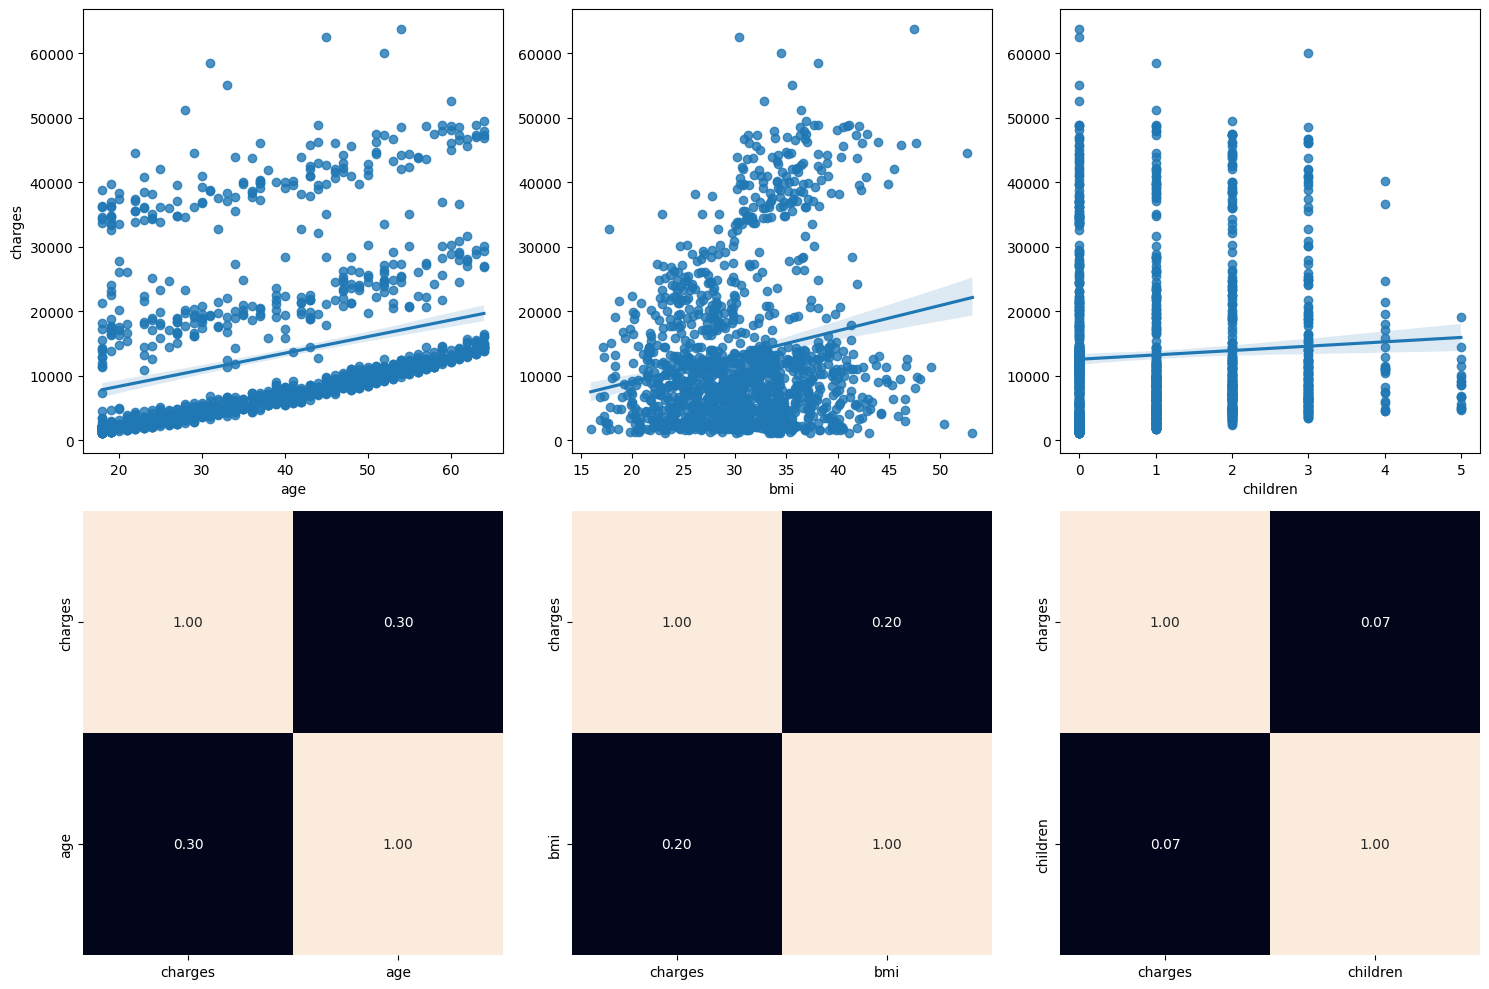

In [22]:
#'age', 'bmi', 'children', 
# target 'charges'

fig, axis = plt.subplots(2, 3, figsize=(15, 10))  # Cambiado a 2 filas, 3 columnas

sns.regplot(ax=axis[0, 0], data=total_data, x="age", y="charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="bmi", y="charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False) # cbar=False añadido para mantener consistencia
sns.regplot(ax=axis[0, 2], data=total_data, x="children", y="charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False) #cbar=False añadido para mantener consistencia

plt.tight_layout()
plt.show()

Conclusiones

1) Charges vs. age: Ligera tendencia positiva, correlación débil (0.30).
2) Charges vs. IMC: Correlación positiva moderada (0.20), relación más clara.
3) Charges vs. children: Correlación casi nula (0.07), sin relación clara.

4) Correlaciones: El IMC tiene la relación más fuerte con los Charges, seguido de la edad, mientras que el número de hijos tiene muy poca influencia.

### 3.2 Categótico-categórico

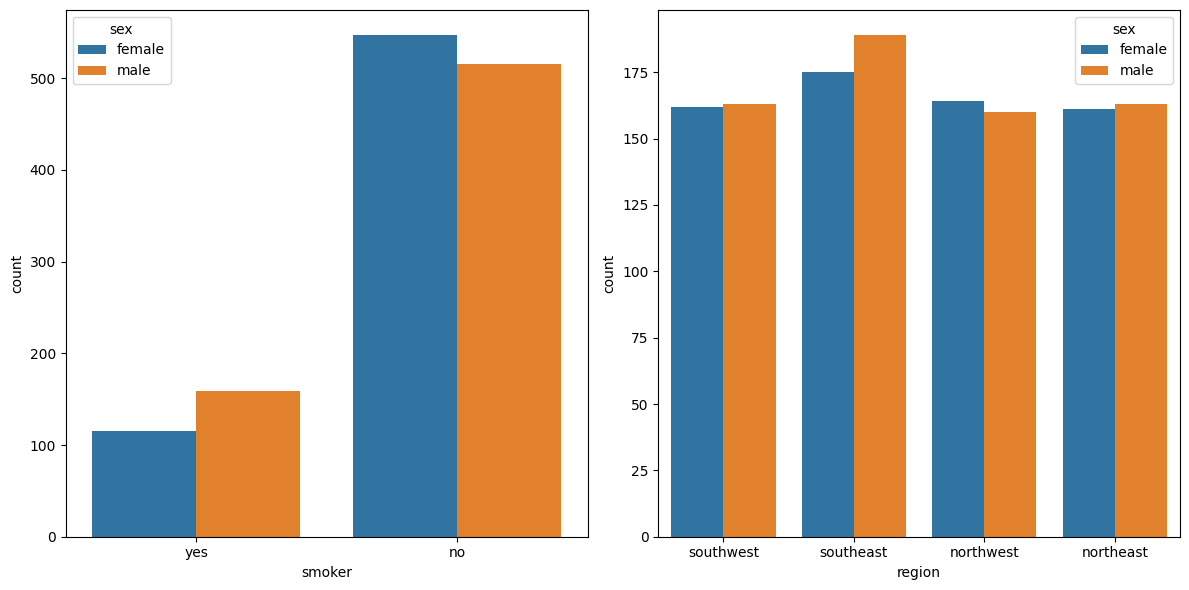

In [30]:
#'sex', 'smoker', 'region'

fig, axis = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(ax=axis[0], data=total_data, x="smoker", hue="sex")
sns.countplot(ax=axis[1], data=total_data, x="region", hue="sex")

plt.tight_layout()
plt.show()

Conclusiones:

1) Fumadores por Sexo:

    * No Fumadores: La mayoría de las personas no fuman, tanto hombres como mujeres.
    * Fumadores: Hay más hombres fumadores que mujeres fumadoras.

2) Región por Sexo:

    * Distribución Similar: La distribución por región es bastante similar entre hombres y mujeres.
    * Leve Variación: Hay una ligera variación en la región sureste, donde hay un poco más de mujeres que hombres.

### 3.3 Combinaciones de la clase con varias predictoras

In [33]:
#'sex', 'smoker', 'region'
# Asignar valores numéricos a las columnas para usar en los gráficos

total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data["region_n"] = pd.factorize(total_data["region"])[0]


sex_transformation_rules = {row["sex"]: row["sex_n"] for _, row in total_data[["sex", "sex_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/sex_tranformation_rules.json", "w") as f:
  json.dump(sex_transformation_rules, f)

smoker_transformation_rules = {row["smoker"]: row["smoker_n"] for _, row in total_data[["smoker", "smoker_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/smoker_tranformation_rules.json", "w") as f:
  json.dump(smoker_transformation_rules, f)

region_transformation_rules = {row["region"]: row["region_n"] for _, row in total_data[["region", "region_n"]].drop_duplicates().iterrows()}
with open("../data/processed/Json/region_tranformation_rules.json", "w") as f:
  json.dump(region_transformation_rules, f)


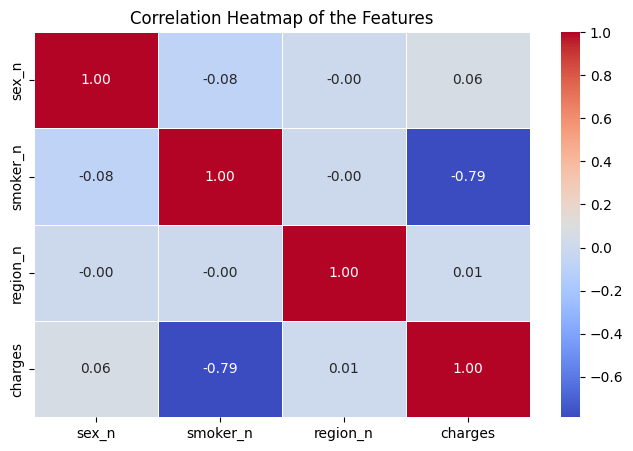

In [36]:
# Crear la matriz de correlación
corr_matrix = total_data[["sex_n", "smoker_n", "region_n", "charges"]].corr()

# Crear el heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Título del gráfico
plt.title("Correlation Heatmap of the Features")

# Mostrar el gráfico
plt.show()

Conclusiones:

1) Correlación Fuerte:

    * charges y smoker_n: Correlación negativa fuerte (-0.79), indicando que fumar está fuertemente asociado con mayores cargos.

2) Correlaciones Débiles:

    * sex_n y charges: Correlación positiva muy débil (0.06).
    * sex_n y smoker_n: Correlación negativa muy débil (-0.08).
    * region_n y charges: Correlación positiva muy débil (0.01).

3) Sin Correlación:

    * region_n y smoker_n: Correlación casi nula (-0.00).
    * sex_n y region_n: Correlación casi nula (-0.00).

En resumen: Fumar (smoker_n) tiene una fuerte influencia negativa en los cargos (charges), mientras que el sexo (sex_n) y la región (region_n) tienen muy poca o ninguna relación con los cargos.

### 3.4 Categórico-numérico

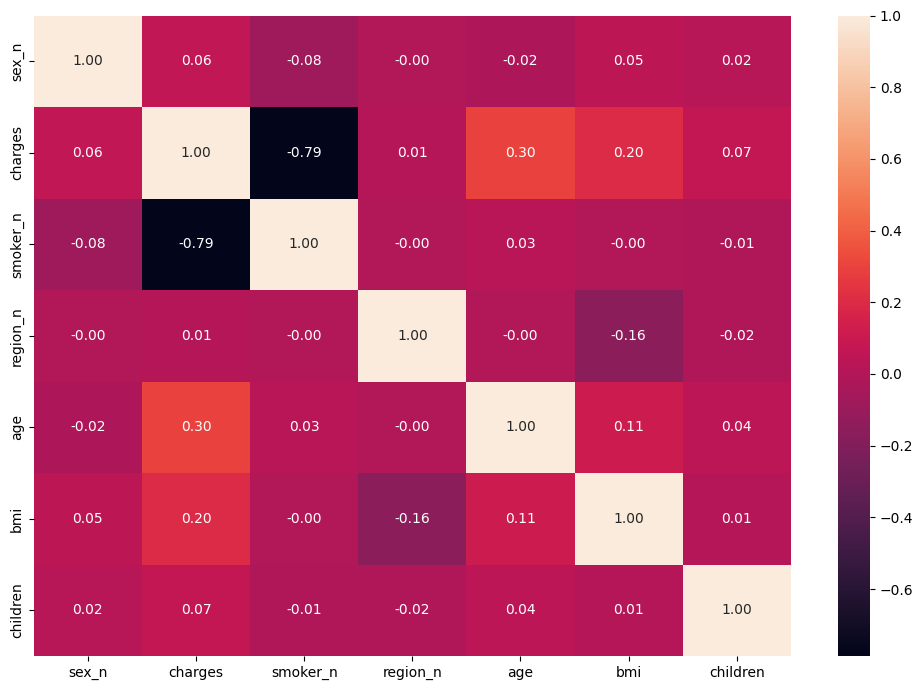

In [37]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["sex_n", "charges", "smoker_n", "region_n", "age", 'bmi', 'children']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Conclusiones:

1) Fumar y Cargos: La variable que más influye en los cargos es si la persona es fumadora. Los fumadores tienden a tener cargos significativamente más altos.

2) Edad e IMC y Cargos: La edad y el índice de masa corporal (IMC) también tienen cierta influencia en los cargos. A medida que aumenta la edad y el IMC, los cargos tienden a ser más altos.

3) Otras Variables: El sexo, la región y el número de hijos tienen muy poca o ninguna influencia en los cargos.

En resumen, los factores más importantes que afectan los cargos son fumar, la edad y el IMC.

## 4. Análisis de toda la data en una

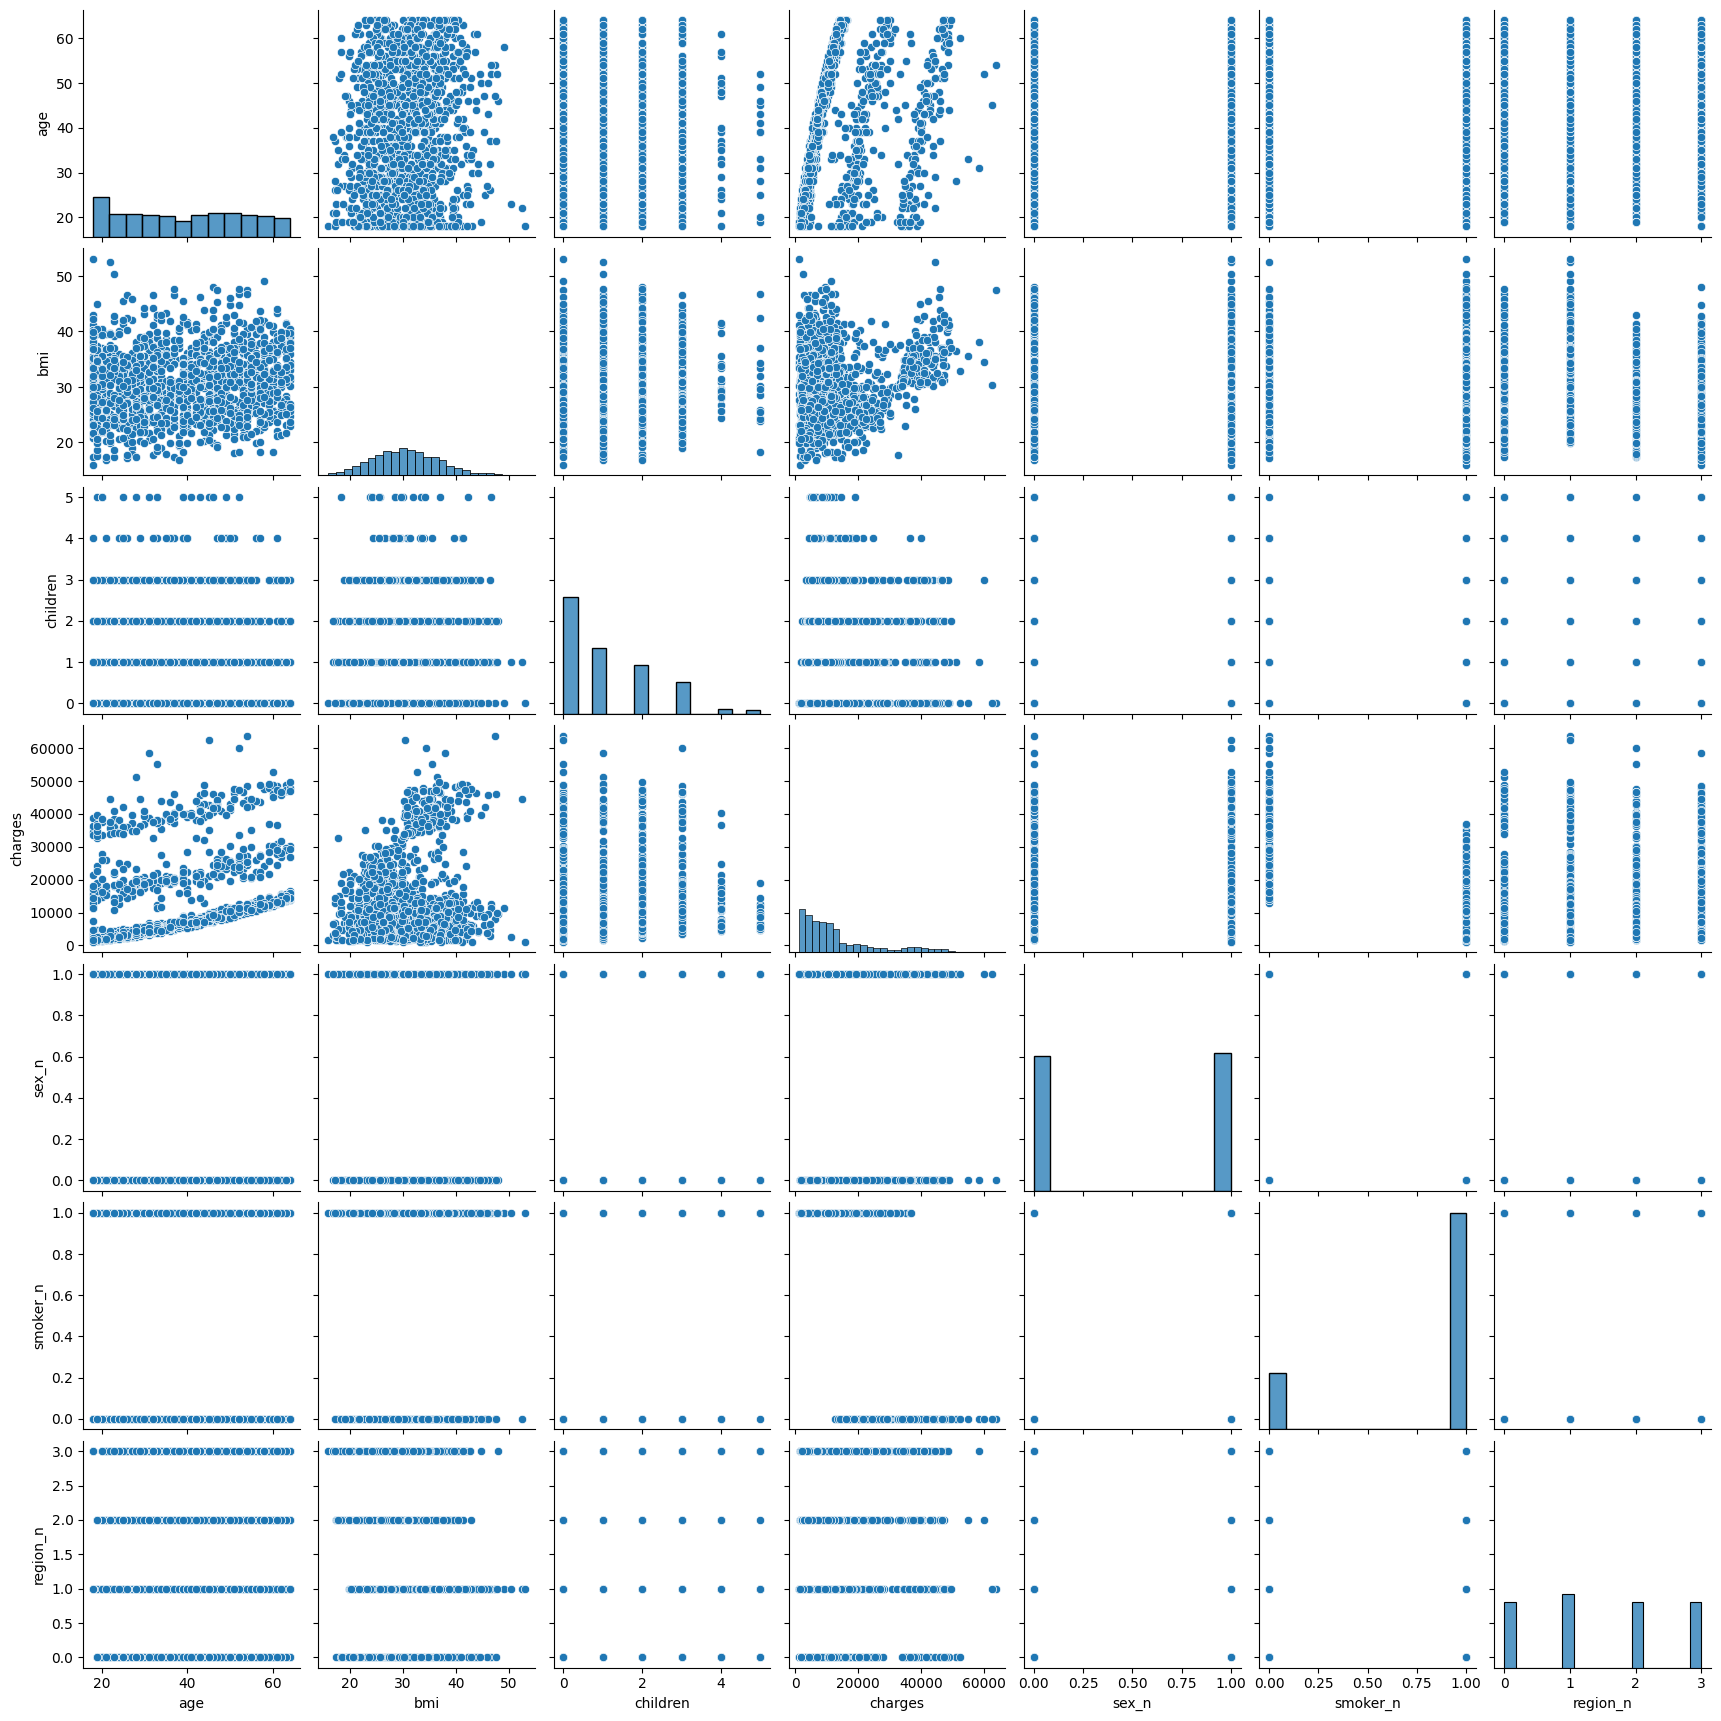

In [38]:
sns.pairplot(data = total_data)

## 5. Feature Engineering

### 5.1 Análisis Outliers

In [39]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


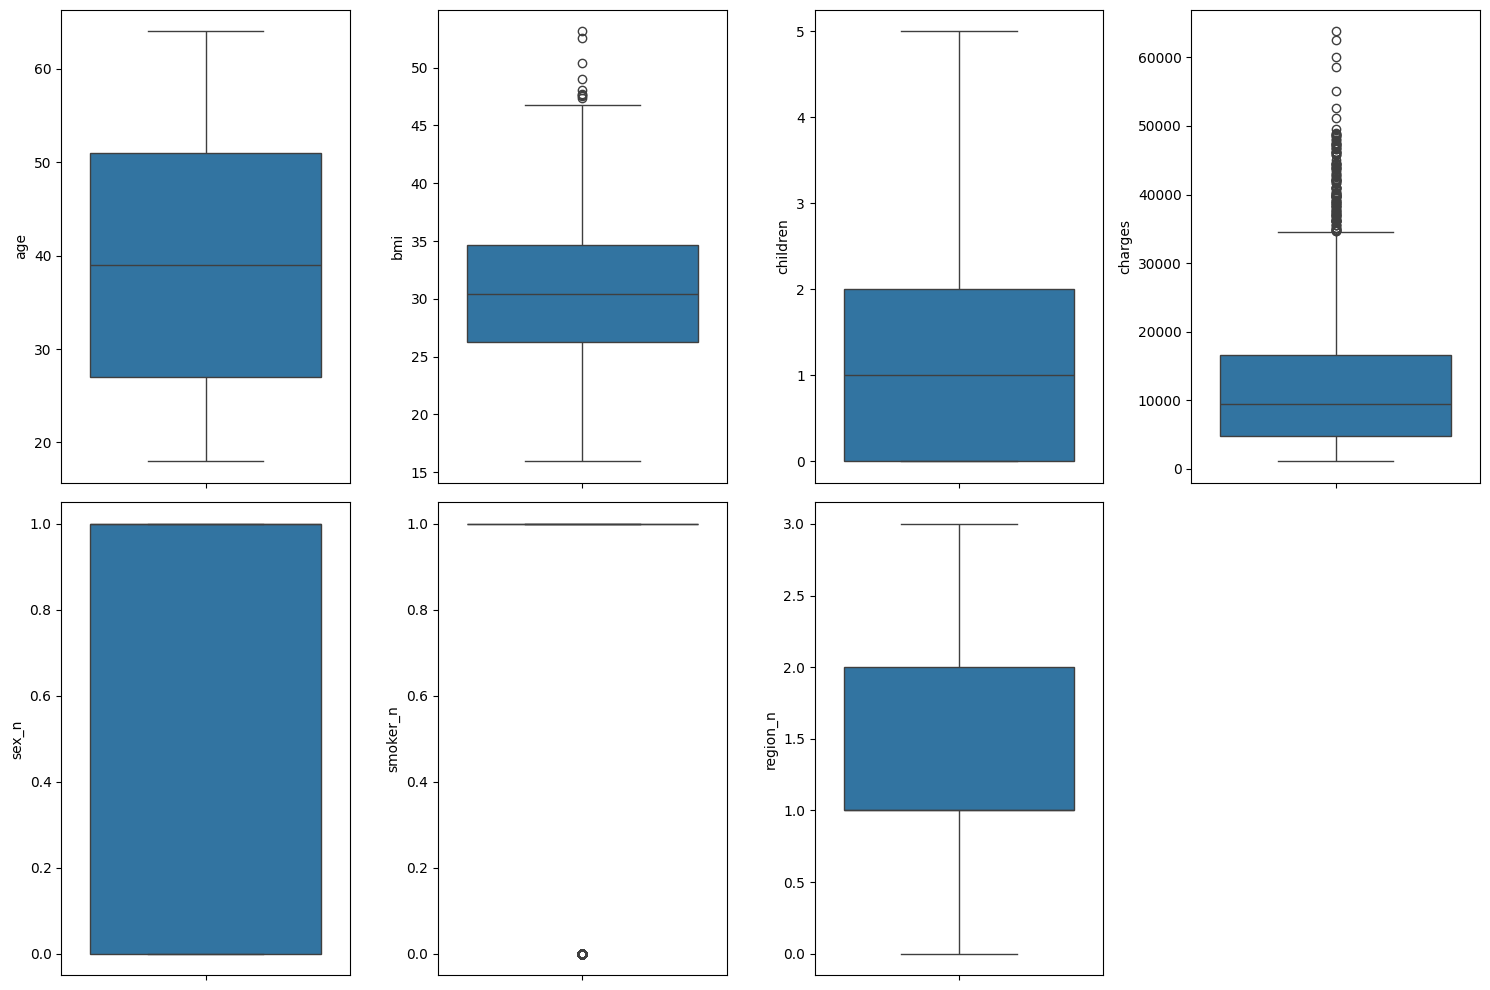

In [ ]:
# 'age', 'bmi', 'children', 'charges','sex_n', 'smoker_n', 'region_n'

fig, axes = plt.subplots(2, 4, figsize=(15, 10)) 

sns.boxplot(ax=axes[0, 0], data=total_data, y="age")
sns.boxplot(ax=axes[0, 1], data=total_data, y="bmi")
sns.boxplot(ax=axes[0, 2], data=total_data, y="children")
sns.boxplot(ax=axes[0, 3], data=total_data, y="charges")
sns.boxplot(ax=axes[1, 0], data=total_data, y="sex_n")
sns.boxplot(ax=axes[1, 1], data=total_data, y="smoker_n")
sns.boxplot(ax=axes[1, 2], data=total_data, y="region_n")

fig.delaxes(axes[1, 3]) 

plt.tight_layout()
plt.show()

In [41]:
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers(column, df):
    colum_stats = df[column].describe()
    IQR = colum_stats["75%"] - colum_stats["25%"]
    lower_bound = colum_stats["25%"] - 1.5 * IQR
    upper_bound = colum_stats["75%"] + 1.5 * IQR
    if lower_bound < 0: lower_bound = min(df[column])
    #remove upper outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    #remove lower outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df.copy(), [lower_bound, upper_bound]

outliers_dict = {}
for column in ["bmi", "smoker_n"]:
    total_data_sin_outliers, limit_list = replace_outliers(column, total_data_sin_outliers)
    # Convertir los límites de np.float64 a float nativo de Python
    outliers_dict[column] = [float(limit) for limit in limit_list] 

with open("../data/processed/Json/outliers_dict.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'bmi': [13.674999999999994, 47.31500000000001], 'smoker_n': [1.0, 1.0]}

### 5.2  Anáisis de valores faltantes

In [42]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
sex_n       0
smoker_n    0
region_n    0
dtype: int64

Conclusiones: En este DF no se presentan valores faltantes

### 5.3 Inferencia de nuevas caraterísticas

No hay columnas en el DF que pueda aplicarse para la inferencia de nuevas características

## 6. Feature Scalling

In [46]:
num_variables = ['age', 'bmi', 'children','sex_n', 'smoker_n', 'region_n']

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("charges", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_con_outliers["charges"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,23,24.510,0,1,1,3
968,21,25.745,2,1,1,3
599,52,37.525,2,0,1,2
170,63,41.470,0,1,1,1
275,47,26.600,2,0,1,3


### 6.1 Normalización

In [47]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,-1.157680,-0.996928,-0.907908,0.971409,0.500292,1.383946
968,-1.300619,-0.792762,0.766904,0.971409,0.500292,1.383946
599,0.914926,1.154664,0.766904,-1.029432,0.500292,0.477983
170,1.701087,1.806837,-0.907908,0.971409,0.500292,-0.427981
275,0.557580,-0.651417,0.766904,-1.029432,0.500292,1.383946


### 6.2 Escalado Mínimo-Máximo

In [48]:
### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("../models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("../data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("../data/processed/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = StandardScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("../models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("../data/processed/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("../data/processed/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n
1114,0.108696,0.230024,0.0,1.0,1.0,1.000000
968,0.065217,0.263250,0.4,1.0,1.0,1.000000
599,0.739130,0.580172,0.4,0.0,1.0,0.666667
170,0.978261,0.686306,0.0,1.0,1.0,0.333333
275,0.630435,0.286252,0.4,0.0,1.0,1.000000


### 6.3 Selección de Características

In [53]:
#Prueba con k=5 para seleccionar las mejores variables para el modelo con outliers sc

modelo_seleccion = SelectKBest(f_classif, k = 6)
modelo_seleccion.fit(X_train_con_outliers, y_train)

ix = modelo_seleccion.get_support()
x_train_sel = pd.DataFrame(modelo_seleccion.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
x_test_sel = pd.DataFrame(modelo_seleccion.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])  

# GUARDAR LOS DATASETS

with open("../data/processed/Json/featureselection_k_6.json", "w") as f:
  json.dump(list(x_train_sel.columns), f)   

x_train_sel.head()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,bmi,children,sex_n,smoker_n,region_n
0,23.0,24.510,0.0,1.0,1.0,3.0
1,21.0,25.745,2.0,1.0,1.0,3.0
2,52.0,37.525,2.0,0.0,1.0,2.0
3,63.0,41.470,0.0,1.0,1.0,1.0
4,47.0,26.600,2.0,0.0,1.0,3.0


In [54]:
x_train_sel["charges"]=list(y_train)
x_test_sel["charges"]=list(y_test)

x_train_sel.to_csv("../models/x_train_sel.csv", index = False)
x_test_sel.to_csv("../models/x_test_sel.csv", index = False)